## Étape n°1 : Récupérer les jeux de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df_anim = pd.read_csv("df_anim.csv")
df_anim.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


In [3]:
df_veg = pd.read_csv("df_veg.csv")
df_veg.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


In [4]:
df_pop = pd.read_csv("df_pop.csv")
df_pop.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations


## Étape n°2 : Nettoyage et préparation des données

#### 1) Nettoyer les titres de colonnes :

In [5]:
def nettoyer_data(data):
    data = data.rename(columns=lambda x: x.replace(' ', '_')) 
    data = data.rename(columns=lambda x: x.replace('/', '_')) 
    data = data.rename(columns=lambda x: x.lower()) 
    data = data.rename(columns=lambda x: x.strip()) 
    return(data)

In [6]:
df_anim = nettoyer_data(df_anim)

In [7]:
df_veg = nettoyer_data(df_veg)

In [8]:
df_pop = nettoyer_data(df_pop)

#### 2) Quelle sont les dimensions des jeux de données ?

In [9]:
df_anim.shape

(31542, 14)

In [10]:
df_veg.shape

(93458, 14)

In [11]:
df_pop.shape

(366, 14)

#### 3) A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [12]:
# Already done !!

#### 4) Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’

In [13]:
df_anim = df_anim.assign(type = 'animal')

In [14]:
df_anim.head()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value,animal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value,animal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value,animal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value,animal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value,animal


In [15]:
df_veg = df_veg.assign(type = 'vegetal')

In [16]:
df_veg.head()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value,vegetal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value,vegetal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value,vegetal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value,vegetal


#### regroupez les deux jeux de données en 1 et appelez ce DataFrame product.

In [17]:
df_anim.columns

Index(['domain_code', 'domain', 'area_code_(fao)', 'area', 'element_code',
       'element', 'item_code_(fao)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'type'],
      dtype='object')

In [18]:
df_veg.columns

Index(['domain_code', 'domain', 'area_code_(fao)', 'area', 'element_code',
       'element', 'item_code_(fao)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'type'],
      dtype='object')

In [19]:
product = pd.concat([df_veg, df_anim],ignore_index=True)


In [20]:
product.shape

(125000, 15)

In [21]:
product.head()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value,vegetal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value,vegetal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value,vegetal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value,vegetal


In [22]:
product.tail()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
124995,FBS,Food Balances (2010-),181,Zimbabwe,664,Food supply (kcal/capita/day),2775,Aquatic Plants,2019,2019,kcal/capita/day,0.0,E,Estimated value,animal
124996,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.0,E,Estimated value,animal
124997,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2019,2019,g/capita/day,0.0,E,Estimated value,animal
124998,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.0,E,Estimated value,animal
124999,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2775,Aquatic Plants,2019,2019,g/capita/day,0.0,E,Estimated value,animal


In [23]:
product.columns

Index(['domain_code', 'domain', 'area_code_(fao)', 'area', 'element_code',
       'element', 'item_code_(fao)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'type'],
      dtype='object')

#### 5) Transformez df_pop

In [24]:
df_pop.head(10)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations
5,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,43053.05,X,Figure from international organizations
6,FBS,Food Balances (2010-),7,Angola,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,30810.00,X,Figure from international organizations
7,FBS,Food Balances (2010-),7,Angola,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,31825.29,X,Figure from international organizations
8,FBS,Food Balances (2010-),8,Antigua and Barbuda,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,96.00,X,Figure from international organizations
9,FBS,Food Balances (2010-),8,Antigua and Barbuda,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,97.12,X,Figure from international organizations


In [25]:

mycolumns = ["area_code_(fao)","area","year", "value"]
df_pop = df_pop[mycolumns]
df_pop.head()


,area_code_(fao),area,year,value
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00


In [26]:
df_pop = df_pop.rename(columns={'value': 'pop_1000_hab'})

In [27]:
df_pop.head()

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00


#### 6) Transformez products

In [28]:
mycolumns2 = ["area_code_(fao)","area", "year","element", "item" , "type", "unit" ,"value"]
product = product[mycolumns2]
product.head()

,area_code_(fao),area,year,element,item,type,unit,value
0,2,Afghanistan,2018,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,kg,160.12
1,2,Afghanistan,2019,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,kg,158.95
2,2,Afghanistan,2018,Food supply (kcal/capita/day),Wheat and products,vegetal,kcal/capita/day,1372.02
3,2,Afghanistan,2019,Food supply (kcal/capita/day),Wheat and products,vegetal,kcal/capita/day,1361.66
4,2,Afghanistan,2018,Protein supply quantity (g/capita/day),Wheat and products,vegetal,g/capita/day,37.00


#### 7) Fusionnez df_pop avec products

In [29]:
df = pd.merge(df_pop, product, on =['area_code_(fao)','area','year'])

In [30]:
df.head()

,area_code_(fao),area,year,pop_1000_hab,element,item,type,unit,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,kg,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,kcal/capita/day,1372.02
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,g/capita/day,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,g/capita/day,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,kg,19.78


In [31]:
df = df.drop('unit', axis = 1)

In [32]:
df.head()

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78


#### 8) Quelles sont les types de données de chaque colonne ?

In [33]:
df.dtypes

area_code_(fao)      int64
area                object
year                 int64
pop_1000_hab       float64
element             object
item                object
type                object
value              float64
dtype: object

#### 9) Combien y-a t’il de valeurs manquantes par variable ?

In [34]:
# Count the number of missing values per variable
missing_values_per_variable = df.isnull().sum()

# Display the result
print(missing_values_per_variable)

area_code_(fao)    0
area               0
year               0
pop_1000_hab       0
element            0
item               0
type               0
value              0
dtype: int64


In [35]:
# Identify rows that contain the string 'ba'
# rows_with_string = df[df['area'].str.contains(r'\bO\b')]


#### 10) Les valeurs aberrantes ?

In [36]:
df.describe()

,area_code_(fao),year,pop_1000_hab,value
count,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,128.742184,2018.508584,5.143125e+04,11.001024
std,75.250822,0.499928,1.872539e+05,56.218072
min,1.000000,2018.000000,1.076000e+01,-0.030000
25%,66.000000,2018.000000,2.801000e+03,0.000000
50%,124.000000,2019.000000,9.965000e+03,0.190000
75%,191.000000,2019.000000,3.182529e+04,2.800000
max,351.000000,2019.000000,1.465634e+06,1779.760000


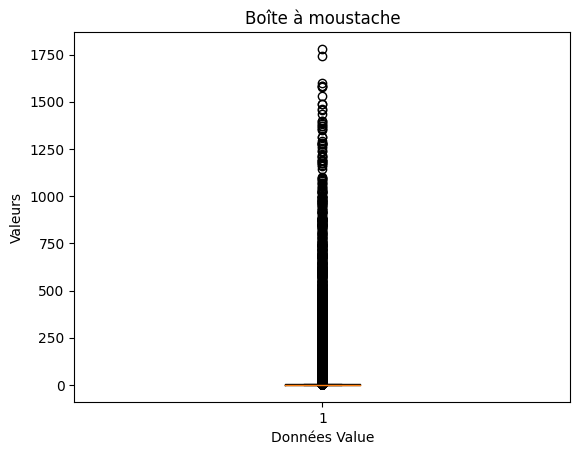

In [37]:

# Tracé de la boîte à moustache
fig, ax = plt.subplots()
ax.boxplot(df['value'])

# Ajout de titres et de labels
ax.set_title('Boîte à moustache')
ax.set_xlabel('Données Value')
ax.set_ylabel('Valeurs')

# Affichage de la boîte à moustache
plt.show()

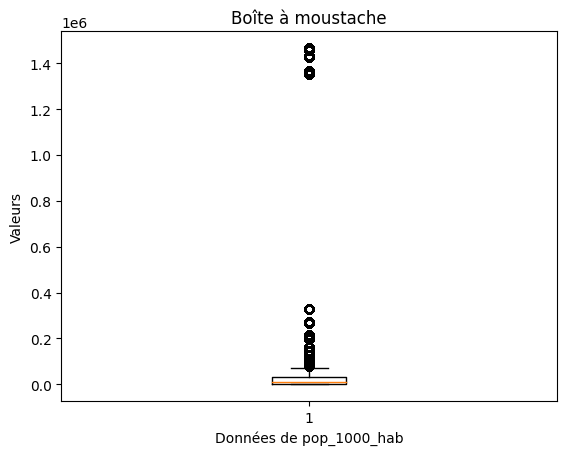

In [38]:
# Tracé de la boîte à moustache
fig, ax = plt.subplots()
ax.boxplot(df['pop_1000_hab'])

# Ajout de titres et de labels
ax.set_title('Boîte à moustache')
ax.set_xlabel('Données de pop_1000_hab')
ax.set_ylabel('Valeurs')

# Affichage de la boîte à moustache
plt.show()

=> On constate une présence des points aberrantes pour les deux variables.

#### 11) Affichez les valeurs uniques de la colonne area

In [39]:
# Get the count of unique values in a column
value_counts = df['area'].value_counts()

# Display the unique values and their counts
print(value_counts)

Sudan                               748
Nepal                               744
Senegal                             744
China                               744
Uganda                              740
                                   ... 
Qatar                               352
South Sudan                         348
Bhutan                              310
Micronesia (Federated States of)    264
Nauru                               264
Name: area, Length: 186, dtype: int64


In [40]:
df['area'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fre

#### 13) Modifiez votre jeu de données

area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes.
Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. 
Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [41]:
df.head()

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78


In [42]:
# renommer la colonne spécifique
df = df.rename(columns={'area_code_(fao)': 'area_code'})

In [43]:
df.head()

,area_code,area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78


In [44]:
# méthode pivot

In [45]:
df = df.pivot_table(index= ['area_code','area','year','item','pop_1000_hab','type'], columns='element', values = 'value')
df.head()


element                                                              Fat supply quantity (g/capita/day)  \
area_code area    year item                    pop_1000_hab type                                          
1         Armenia 2018 Apples and products     2951.74      vegetal                                0.12   
                       Aquatic Animals, Others 2951.74      animal                                 0.00   
                       Aquatic Plants          2951.74      animal                                 0.00   
                       Bananas                 2951.74      vegetal                                0.06   
                       Barley and products     2951.74      vegetal                                0.29   

element                                                              Food supply (kcal/capita/day)  \
area_code area    year item                    pop_1000_hab type                                     
1         Armenia 2018 Apples and products     2951.74      vegetal                          21.17   
                       Aquatic Animals, Others 2951.74      animal                            0.01   
                       Aquatic Plants          2951.74      animal                            0.00   
                       Bananas                 2951.74      vegetal                          12.51   
                       Barley and products     2951.74      vegetal                          54.14   

element                                                              Food supply quantity (kg/capita/yr)  \
area_code area    year item                    pop_1000_hab type                                           
1         Armenia 2018 Apples and products     2951.74      vegetal                                13.95   
                       Aquatic Animals, Others 2951.74      animal                                  0.00   
                       Aquatic Plants          2951.74      animal                                  0.00   
                       Bananas                 2951.74      vegetal                                 7.61   
                       Barley and products     2951.74      vegetal                                 6.00   

element                                                              Protein supply quantity (g/capita/day)  
area_code area    year item                    pop_1000_hab type                                             
1         Armenia 2018 Apples and products     2951.74      vegetal                                    0.07  
                       Aquatic Animals, Others 2951.74      animal                                     0.00  
                       Aquatic Plants          2951.74      animal                                     0.00  
                       Bananas                 2951.74      vegetal                                    0.15  
                       Barley and products     2951.74      vegetal                                    1.80

In [46]:
df = df.reset_index()

#### 14) Faire du nettoyage dans le nom des colonnes

In [47]:
df.head(10)

element,area_code,area,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80
5,1,Armenia,2018,Beans,2951.74,vegetal,0.06,11.08,1.19,0.72
6,1,Armenia,2018,Beer,2951.74,vegetal,0.00,15.13,11.27,0.15
7,1,Armenia,2018,"Beverages, Alcoholic",2951.74,vegetal,0.00,0.02,0.00,0.00
8,1,Armenia,2018,"Beverages, Fermented",2951.74,vegetal,0.00,0.00,0.00,0.00
9,1,Armenia,2018,Bovine Meat,2951.74,animal,11.65,148.82,24.91,10.27


In [48]:
df = nettoyer_data(df)

In [49]:
df.shape

(31428, 10)

In [50]:
df_non_imputer = df

In [51]:
# Count the number of missing values per variable
missing_values_per_variable = df.isnull().sum()

# Display the result
print(missing_values_per_variable)

element
area_code                                   0
area                                        0
year                                        0
item                                        0
pop_1000_hab                                0
type                                        0
fat_supply_quantity_(g_capita_day)        222
food_supply_(kcal_capita_day)             263
food_supply_quantity_(kg_capita_yr)         7
protein_supply_quantity_(g_capita_day)    220
dtype: int64


In [52]:
# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
df['fat_supply_quantity_(g_capita_day)'] = imputer.fit_transform(df[['fat_supply_quantity_(g_capita_day)']])

In [53]:
# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
df['food_supply_(kcal_capita_day)'] = imputer.fit_transform(df[['food_supply_(kcal_capita_day)']])

In [54]:
# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
df['food_supply_quantity_(kg_capita_yr)'] = imputer.fit_transform(df[['food_supply_quantity_(kg_capita_yr)']])

In [55]:
# Imputer les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
df['protein_supply_quantity_(g_capita_day)'] = imputer.fit_transform(df[['protein_supply_quantity_(g_capita_day)']])

In [56]:
# calculer le nombre de valeurs manquantes par colonne
nb_missing = df.isna().sum()
nb_missing

element
area_code                                 0
area                                      0
year                                      0
item                                      0
pop_1000_hab                              0
type                                      0
fat_supply_quantity_(g_capita_day)        0
food_supply_(kcal_capita_day)             0
food_supply_quantity_(kg_capita_yr)       0
protein_supply_quantity_(g_capita_day)    0
dtype: int64

#### 15) Créez des masques

In [57]:
df_ss_mask = df

In [58]:
mask = df['year'] == 2018

In [59]:
df = df[mask]

In [60]:
df.head()

element,area_code,area,year,item,pop_1000_hab,type,fat_supply_quantity_(g_capita_day),food_supply_(kcal_capita_day),food_supply_quantity_(kg_capita_yr),protein_supply_quantity_(g_capita_day)
0,1,Armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80


#### 16) Ajouter une nouvelle colonne à notre jeu de données

In [61]:
list_name = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 
             'central_america', 'caribbean', 'south_america', 'central_asia', 
             'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 
             'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']
name = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 
             'central_america', 'caribbean', 'south_america', 'central_asia', 
             'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 
             'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']

In [62]:
def read_csv_files(l):
    for  arg,nom in l:
        
        nom  = pd.read_csv(arg + ".csv")
        nom['zone_géo'] = arg
    return nom


## Étape n°3: Exploration

#### 1) Calculer la Médiane de de la variable fat_supply_quantity_(g/capita/day)

In [63]:
# Calculer la médiane
median = np.median(df['fat_supply_quantity_(g_capita_day)'])
print("La médiane est :", median)

# Calculer le premier quartile (Q1) et le troisième quartile (Q3)
q1 = np.percentile(df['fat_supply_quantity_(g_capita_day)'], 25)
q3 = np.percentile(df['fat_supply_quantity_(g_capita_day)'], 75)
print("Q1 est :", q1)
print("Q3 est :", q3)

# Calculer la moyenne
mean = np.mean(df['fat_supply_quantity_(g_capita_day)'])
print("La moyenne est :", mean)

# Calculer l'écart type
std_dev = np.std(df['fat_supply_quantity_(g_capita_day)'])
print("L'écart type est :", std_dev)

La médiane est : 0.03
Q1 est : 0.0
Q3 est : 0.37
La moyenne est : 1.058999949488307
L'écart type est : 3.422976405204791


In [64]:
df['fat_supply_quantity_(g_capita_day)'].describe()

count    15439.000000
mean         1.059000
std          3.423087
min          0.000000
25%          0.000000
50%          0.030000
75%          0.370000
max         61.240000
Name: fat_supply_quantity_(g_capita_day), dtype: float64

#### 2) Visualisez la distribution des données numériques à l’aide d’un histogramme.

In [65]:
data = df[['pop_1000_hab','fat_supply_quantity_(g_capita_day)','food_supply_(kcal_capita_day)','food_supply_quantity_(kg_capita_yr)','protein_supply_quantity_(g_capita_day)']]
data.head()

element,pop_1000_hab,fat_supply_quantity_(g_capita_day),food_supply_(kcal_capita_day),food_supply_quantity_(kg_capita_yr),protein_supply_quantity_(g_capita_day)
0,2951.74,0.12,21.17,13.95,0.07
1,2951.74,0.00,0.01,0.00,0.00
2,2951.74,0.00,0.00,0.00,0.00
3,2951.74,0.06,12.51,7.61,0.15
4,2951.74,0.29,54.14,6.00,1.80


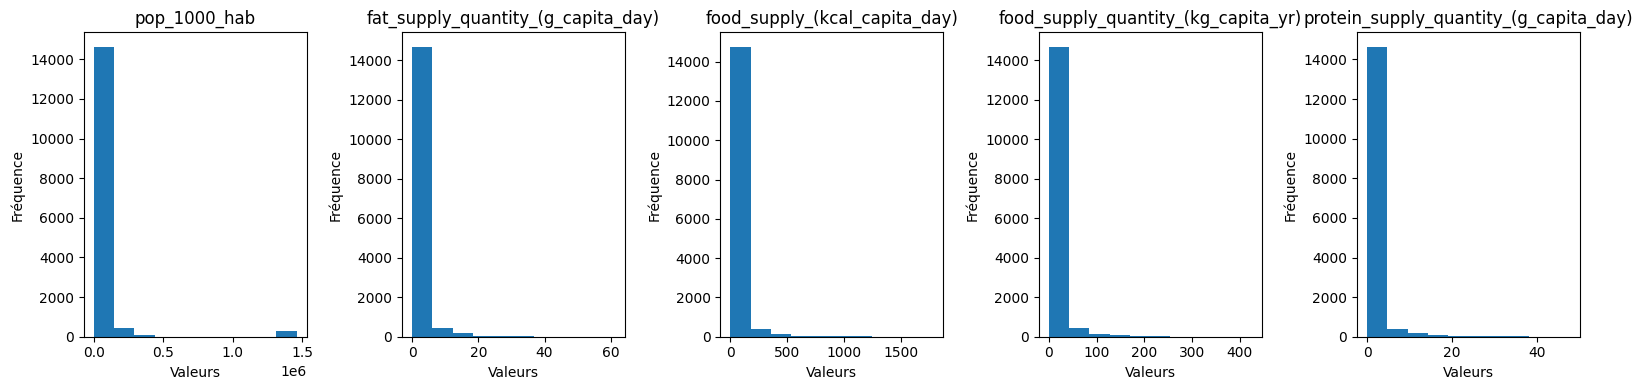

In [66]:
# Créer un histogramme avec 10 bin (classes)

# Créer plusieurs sous-graphiques
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

# Parcourir chaque colonne et créer un histogramme
for i, col in enumerate(data.columns):
    axs[i].hist(data[col])
    axs[i].set_title(col)
    axs[i].set_xlabel('Valeurs')
    axs[i].set_ylabel('Fréquence')

# Ajuster la disposition des graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()



/tmp/ipykernel_44186/2506866141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pop_1000_hab_log'] = np.log10(data['pop_1000_hab'])


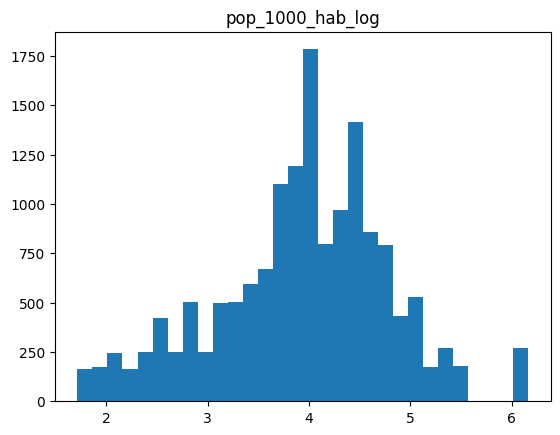

In [67]:
# effectuer une transformation logarithmique sur la colonne 'col3' si nécessaire
if data['pop_1000_hab'].max() > 1.0:
    data['pop_1000_hab_log'] = np.log10(data['pop_1000_hab'])
    plt.hist(data['pop_1000_hab_log'], bins=30)
    plt.title('pop_1000_hab_log')
    plt.show()

#### 3) Quelle est la population de l’Ukraine en 2018

In [68]:
donnes_UKraine = df.loc[(df['area'] == 'Ukraine') & (df['year'] == 2018)]

In [69]:
donnes_UKraine.head(10)

element,area_code,area,year,item,pop_1000_hab,type,fat_supply_quantity_(g_capita_day),food_supply_(kcal_capita_day),food_supply_quantity_(kg_capita_yr),protein_supply_quantity_(g_capita_day)
28231,230,Ukraine,2018,Apples and products,44246.0,vegetal,0.16,26.46,19.91,0.06
28232,230,Ukraine,2018,"Aquatic Animals, Others",44246.0,animal,0.00,0.01,0.01,0.00
28233,230,Ukraine,2018,Aquatic Plants,44246.0,animal,0.00,0.00,0.00,0.00
28234,230,Ukraine,2018,Bananas,44246.0,vegetal,0.05,9.32,5.67,0.11
28235,230,Ukraine,2018,Barley and products,44246.0,vegetal,0.00,0.63,0.10,0.02
28236,230,Ukraine,2018,Beer,44246.0,vegetal,0.00,52.62,39.19,0.54
28237,230,Ukraine,2018,"Beverages, Alcoholic",44246.0,vegetal,0.00,64.38,7.97,0.00
28238,230,Ukraine,2018,"Beverages, Fermented",44246.0,vegetal,0.00,0.05,0.04,0.00
28239,230,Ukraine,2018,Bovine Meat,44246.0,animal,3.61,45.39,7.42,3.01
28240,230,Ukraine,2018,"Butter, Ghee",44246.0,animal,2.52,22.25,1.13,0.03


In [70]:
a = donnes_UKraine['pop_1000_hab'].unique()[0]

In [71]:
print('la population de l’Ukraine en 2018 est : ', a)

la population de l’Ukraine en 2018 est :  44246.0


#### 4) Quels sont les 10 pays les plus peuplés ?

In [72]:
df_sorted_desc = df.sort_values(by=['pop_1000_hab'], ascending = False)
df_sorted_desc.head(10)

element,area_code,area,year,item,pop_1000_hab,type,fat_supply_quantity_(g_capita_day),food_supply_(kcal_capita_day),food_supply_quantity_(kg_capita_yr),protein_supply_quantity_(g_capita_day)
31334,351,China,2018,Yams,1459378.0,vegetal,0.00,0.01,0.00,0.00
31276,351,China,2018,Groundnuts,1459378.0,vegetal,4.91,58.54,5.82,2.54
31266,351,China,2018,Demersal Fish,1459378.0,animal,0.06,5.40,3.12,1.09
31267,351,China,2018,Eggs,1459378.0,animal,5.65,79.61,19.71,6.18
31268,351,China,2018,"Fats, Animals, Raw",1459378.0,animal,4.33,38.90,1.71,0.00
31270,351,China,2018,"Fish, Liver Oil",1459378.0,animal,0.00,0.00,0.00,0.00
31271,351,China,2018,Freshwater Fish,1459378.0,animal,1.20,33.14,17.60,5.23
31272,351,China,2018,"Fruits, other",1459378.0,vegetal,0.31,40.77,35.64,0.50
31273,351,China,2018,Grapefruit and products,1459378.0,vegetal,0.01,1.93,2.92,0.03
31274,351,China,2018,Grapes and products (excl wine),1459378.0,vegetal,0.04,7.89,7.24,0.08


In [73]:
# Sélectionner les 10 premières valeurs distinctes dans la colonne "area"
valeurs_distinctes = df_sorted_desc['area'].drop_duplicates().head(10)

In [74]:
valeurs_distinctes

31334                       China
4918              China, mainland
11756                       India
28436    United States of America
11981                   Indonesia
20516                    Pakistan
2613                       Brazil
20167                     Nigeria
2008                   Bangladesh
22991          Russian Federation
Name: area, dtype: object

#### 5) Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ?

In [75]:
pop_2018 = df.loc[(df['year'] == 2018)]

In [76]:
pop_2018['pop_1000_hab'].sum()

800253594.67

In [77]:
pop_2019 = df_ss_mask.loc[(df_ss_mask['year'] == 2019)]

In [78]:
pop_2019['pop_1000_hab'].sum()

810815484.34

Ces chiffres ne corresspondent pas à la réalité

#### 6) Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ?

In [79]:
# calculer le nombre de valeurs manquantes par colonne
nb_mis = df_non_imputer.isna().sum()
nb_mis

element
area_code                                 0
area                                      0
year                                      0
item                                      0
pop_1000_hab                              0
type                                      0
fat_supply_quantity_(g_capita_day)        0
food_supply_(kcal_capita_day)             0
food_supply_quantity_(kg_capita_yr)       0
protein_supply_quantity_(g_capita_day)    0
dtype: int64

#### 7) Créez une nouvelle colonne taux_croissance_pop_18_19